In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost
import seaborn as sns
from geopy.distance import vincenty

In [9]:
[f for f in os.listdir(os.curdir) if 'csv' in f]

[]

In [10]:
[f for f in os.listdir('../data') if 'csv' in f]

['taxi.csv', 'rosbank_test.csv', 'housing.csv', 'rosbank_train.csv']

In [12]:
data_raw = pd.read_csv('../data/taxi.csv')

In [13]:
data_raw.head(40)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,private,0
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.000,-1.000,Standard,business,1
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,private,0
8,493006,5,20,6080,753429,55.818748,37.338240,55.835764,37.294710,6.222,15.433,Economy,private,0
9,953983,6,7,6080,533820,55.839155,37.251947,55.833198,37.312197,10.410,23.083,Economy,private,0


In [15]:
data_raw.groupby('driver_gk').count()

,offer_gk,weekday_key,hour_key,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
driver_gk,,,,,,,,,,,,,
14,212,212,212,212,212,212,212,212,212,212,212,212,212
22,94,94,94,94,94,94,94,94,94,94,94,94,94
42,202,202,202,202,202,202,202,202,202,202,202,202,202
51,261,261,261,261,261,261,261,261,261,261,261,261,261
75,222,222,222,222,222,222,222,222,222,222,222,222,222
80,140,140,140,140,140,140,140,140,140,140,140,140,140
81,141,141,141,141,141,141,141,141,141,141,141,141,141
98,56,56,56,56,56,56,56,56,56,56,56,56,56
156,157,157,157,157,157,157,157,157,157,157,157,157,157


In [16]:
def get_one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [17]:
pd.get_dummies(data_raw, prefix='offer_class_group', drop_first=False)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,...,offer_class_group_Premium,offer_class_group_Standard,offer_class_group_Test,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,offer_class_group_SMB,offer_class_group_affiliate,offer_class_group_business,offer_class_group_private
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,...,0,0,0,0,0,0,0,0,0,1
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,...,0,1,0,0,0,0,0,0,0,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,...,0,0,0,0,0,0,0,0,0,1
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,...,0,0,0,0,0,0,0,0,0,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,...,0,0,0,0,0,0,0,0,0,1
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,...,0,0,0,0,0,0,0,0,0,1
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.000,...,0,1,0,0,0,0,0,0,1,0
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,...,0,0,0,0,0,0,0,0,0,1
8,493006,5,20,6080,753429,55.818748,37.338240,55.835764,37.294710,6.222,...,0,0,0,0,0,0,0,0,0,1
9,953983,6,7,6080,533820,55.839155,37.251947,55.833198,37.312197,10.410,...,0,0,0,0,0,0,0,0,0,1


In [18]:
data_raw['offer_class_group'].value_counts()

Economy     48335
Standard    47288
Premium      1773
Delivery     1290
Kids          588
XL            464
VIP           225
VIP+           29
Test            8
Name: offer_class_group, dtype: int64

In [19]:
col_list = ['offer_class_group', 'ride_type_desc']
one_hot_df = get_one_hot(data_raw[col_list], col_list)
one_hot_df

,offer_class_group,ride_type_desc,offer_class_group_Delivery,offer_class_group_Economy,offer_class_group_Kids,offer_class_group_Premium,offer_class_group_Standard,offer_class_group_Test,offer_class_group_VIP,offer_class_group_VIP+,offer_class_group_XL,ride_type_desc_SMB,ride_type_desc_affiliate,ride_type_desc_business,ride_type_desc_private
0,Economy,private,0,1,0,0,0,0,0,0,0,0,0,0,1
1,Standard,private,0,0,0,0,1,0,0,0,0,0,0,0,1
2,Economy,private,0,1,0,0,0,0,0,0,0,0,0,0,1
3,Economy,private,0,1,0,0,0,0,0,0,0,0,0,0,1
4,Economy,private,0,1,0,0,0,0,0,0,0,0,0,0,1
5,Economy,private,0,1,0,0,0,0,0,0,0,0,0,0,1
6,Standard,business,0,0,0,0,1,0,0,0,0,0,0,1,0
7,Economy,private,0,1,0,0,0,0,0,0,0,0,0,0,1
8,Economy,private,0,1,0,0,0,0,0,0,0,0,0,0,1
9,Economy,private,0,1,0,0,0,0,0,0,0,0,0,0,1


In [20]:
data_raw[data_raw['driver_response'] == 1]['offer_class_group'].value_counts()

Standard    24755
Economy     21221
Premium      1368
Delivery      874
Kids          494
XL            330
VIP           174
VIP+           26
Test            6
Name: offer_class_group, dtype: int64

In [21]:
offer_class_group_dict = (
    data_raw[data_raw['driver_response'] == 1]['offer_class_group'].value_counts()
    /
    data_raw['offer_class_group'].value_counts()
).to_dict()

In [22]:
offer_class_group_dict

{'Delivery': 0.6775193798449612,
 'Economy': 0.4390400331023068,
 'Kids': 0.8401360544217688,
 'Premium': 0.7715736040609137,
 'Standard': 0.5234943326002368,
 'Test': 0.75,
 'VIP': 0.7733333333333333,
 'VIP+': 0.896551724137931,
 'XL': 0.7112068965517241}

In [23]:
def get_counts(df_train, df_test, col, target_col):
    category_val_dict = (
        df_train[df_train[target_col] == 1][col].value_counts()
        /
        df_train[col].value_counts()
    ).to_dict()
    df_train[col + '_counts'] = df_train[col].apply(category_val_dict.get)
    df_test[col + '_counts'] = df_test[col].apply(category_val_dict.get)
    return df_train, df_test

In [24]:
data_raw['offer_class_group'].head()

0     Economy
1    Standard
2     Economy
3     Economy
4     Economy
Name: offer_class_group, dtype: object

In [25]:
data_raw['offer_class_group'].apply(offer_class_group_dict.get).head()

0    0.439040
1    0.523494
2    0.439040
3    0.439040
4    0.439040
Name: offer_class_group, dtype: float64

In [26]:
data_raw[['origin_order_latitude', 'origin_order_longitude']]\
.apply(lambda x: str(x[0]) + ' ' + str(x[1]), axis = 1).value_counts()

55.962322 37.407117             15630
55.410307 37.902451              7021
55.964892000000006 37.413543     3250
55.966694 37.415754              2412
55.961995 37.406355               842
55.605226 37.28608300000001       773
55.96236999999999 37.40428        595
55.962951 37.405915               577
55.966563 37.415485               291
55.604797 37.288773               254
55.41449100000001 37.900012       248
55.408786 37.906314               219
55.685447 37.41424                195
55.962815 37.405639               184
55.96455 37.41377                 130
55.962203 37.416373               128
55.97264200000001 37.414589       122
55.746504 37.536305               121
55.4144 37.896652                 114
55.415361 37.898917                89
55.768272 37.590428                86
55.746986 37.539267                86
55.695548 37.39054                 75
55.778464 37.585797                72
55.973648 37.412503                69
55.723759 37.654787                66
55.966380000

In [27]:
def get_woe_v1(df_train, df_test, col, target_col):
    all_good = len(df_train[df_train[target_col] == 1][col])
    all_bad = len(df_train[df_train[target_col] == 0][col])
    odds_series = (
        df_train[df_train[target_col] == 1][col].value_counts()
        /
        df_train[df_train[target_col] == 0][col].value_counts()
    )
    odds_series = odds_series / all_good * all_bad
    category_woe_dict = np.log(odds_series).to_dict()
    df_train[col + '_woe'] = df_train[col].apply(category_woe_dict.get)
    df_test[col + '_woe'] = df_test[col].apply(category_woe_dict.get)
    return df_train, df_test

In [28]:
def get_woe_stat(df_train, col, target):
    stat = df_train.groupby(col)[target].agg(
        [np.mean, np.size, np.count_nonzero], sort=False
    )
    stat.rename(columns={'count_nonzero': 'good', 'size': 'obs', 'mean': 'event_rate'}, inplace=True)
    stat['all_good'] = stat['good'].sum()
    stat['p_good'] = stat['good'] / stat['all_good']
    stat['bad'] = stat['obs'] - stat['good']
    stat['all_bad'] = stat['bad'].sum()
    stat['p_bad'] = stat['bad'] / stat['all_bad']
    stat['WOE']=np.log(stat['p_good'] / stat['p_bad'])
    stat['IV'] = ((stat['p_good'] - stat['p_bad']) * stat['WOE']).sum()
    stat['variable'] = col
    stat['category'] = stat.index
    stat.reset_index(inplace=True)
    stat.drop(labels=col, inplace=True, axis=1)
    return stat

In [29]:
get_woe_stat(data_raw,'offer_class_group', 'driver_response')

,event_rate,obs,good,all_good,p_good,bad,all_bad,p_bad,WOE,IV,variable,category
0,0.677519,1290,874,49248,0.017747,416,50752,0.008197,0.772477,0.083468,offer_class_group,Delivery
1,0.439040,48335,21221,49248,0.430901,27114,50752,0.534245,-0.214977,0.083468,offer_class_group,Economy
2,0.840136,588,494,49248,0.010031,94,50752,0.001852,1.689323,0.083468,offer_class_group,Kids
3,0.771574,1773,1368,49248,0.027778,405,50752,0.007980,1.247300,0.083468,offer_class_group,Premium
4,0.523494,47288,24755,49248,0.502660,22533,50752,0.443983,0.124129,0.083468,offer_class_group,Standard
5,0.750000,8,6,49248,0.000122,2,50752,0.000039,1.128695,0.083468,offer_class_group,Test
6,0.773333,225,174,49248,0.003533,51,50752,0.001005,1.257312,0.083468,offer_class_group,VIP
7,0.896552,29,26,49248,0.000528,3,50752,0.000059,2.189567,0.083468,offer_class_group,VIP+
8,0.711207,464,330,49248,0.006701,134,50752,0.002640,0.931335,0.083468,offer_class_group,XL


In [30]:
data_raw[['offer_class_group']].head(5)

,offer_class_group
0,Economy
1,Standard
2,Economy
3,Economy
4,Economy


In [31]:
# create categories based on the part of the day
def process_hour(hour):
    if 6 <= hour < 12:
        return 0
    elif 12 <= hour < 18:
        return 1
    elif 18 <= hour < 24:
        return 2
    elif 0 <= hour < 6:
        return 3

In [32]:
# create "is weekend?" feature
def process_day(day):
    if day <= 4:
        return 0
    else:
        return 1

In [33]:
# get vincenty distance between two points
def compute_dist_in_km(coords1, coords2):
    return vincenty(coords1, coords2).kilometers

In [34]:
# calculate ride cost based on the plan
def compute_taxi_cost(row):
    if row.offer_class_group == "Economy":
        return 97 + 7 * row.distance_km + 7 * row.duration_min
    elif row.offer_class_group == "Standard":
        return 150 + 11 * row.distance_km + 13 * row.duration_min
    elif row.offer_class_group == "Premium":
        return 299 + 15 * row.distance_km + 20 * row.duration_min
    elif row.offer_class_group == "Kids":
        return 99 + 22 * row.duration_min
    elif row.offer_class_group == "VIP":
        return 699 + 55 * row.distance_km + 25 * row.duration_min
    elif row.offer_class_group == "XL":
        return 299 + 15 * row.distance_km + 25 * row.duration_min
    else:
        return -1

In [35]:
airports_coordinates = [
    ("Domodedovo", (55.415832, 37.896903), 3), # Domodedovo
    ("Sheremetyevo", (55.972323, 37.412804), 3), # Sheremetyevo
    ("Vnukovo", (55.598791, 37.269157), 3), # Vnukovo
    ("Zhukovskiy", (55.561805, 38.118139), 3), # Zhukovskiy
    ("Moscow_center", (55.753742, 37.621852), 5), # center
]

In [36]:
# calculate distance from driver to airport and from origin to airport
def compute_airport_driver_dist(data):
    for airport, (air_latitude, air_longitude), radius in airports_coordinates:
        print(airport)

        dist_column_name = 'driver_dist_to_{}'.format(airport)
        radius_column_name = 'driver_near_to_{}'.format(airport)
        data[dist_column_name] = data.apply(
            lambda row: compute_dist_in_km(
                (row['driver_latitude'], row['driver_longitude'], (air_latitude, air_longitude))
            ),
            axis=1
        )
        data[radius_column_name] = data[dist_column_name].apply(lambda x: 1 if x <= radius else 0)
        # print(radius, len(dummies_df[dummies_df[radius_column_name] == 1]))


        dist_column_name = 'origin_order_dist_to_{}'.format(airport)
        radius_column_name = 'origin_order_near_to_{}'.format(airport)
        data[dist_column_name] = data.apply(
            lambda row: compute_dist_in_km(
                (row['origin_order_latitude'], row['origin_order_longitude']), (air_latitude, air_longitude)
            ),
            axis=1
        )
        data[radius_column_name] = data[dist_column_name].apply(lambda x: 1 if x <= radius else 0)
        # print(radius, len(dummies_df[dummies_df[radius_column_name] == 1]))
    return data

In [37]:
data_raw[['driver_latitude', 'driver_longitude']].apply(
    lambda x: str(np.round(x[0], 2)) + ' ' + str(np.round(x[1], 2)), axis=1
).value_counts(normalize=True)

55.96 37.41    0.21691
55.41 37.9     0.03317
55.96 37.42    0.03148
55.42 37.9     0.01891
55.97 37.42    0.01028
55.61 37.29    0.00846
55.76 37.61    0.00829
55.75 37.58    0.00696
55.77 37.62    0.00652
55.85 37.44    0.00646
55.77 37.59    0.00630
55.75 37.54    0.00625
55.76 37.6     0.00608
55.78 37.59    0.00591
55.77 37.6     0.00589
55.42 37.89    0.00585
55.77 37.61    0.00578
55.73 37.63    0.00502
55.75 37.61    0.00499
55.76 37.62    0.00474
55.45 37.86    0.00463
55.81 37.58    0.00462
55.75 37.57    0.00458
55.69 37.41    0.00440
55.43 37.88    0.00418
55.95 37.42    0.00413
55.75 37.6     0.00395
55.76 37.56    0.00387
55.78 37.58    0.00387
55.43 37.86    0.00381
                ...   
55.6 37.78     0.00001
55.69 37.1     0.00001
55.72 37.3     0.00001
55.49 37.75    0.00001
55.93 37.77    0.00001
55.98 37.2     0.00001
55.44 37.77    0.00001
55.86 37.53    0.00001
55.73 37.28    0.00001
55.64 37.44    0.00001
55.51 37.37    0.00001
55.54 37.64    0.00001
55.72 37.93

In [38]:
def build_new_columns(data):
    origin_coordindates = data[
        ['origin_order_latitude', 'origin_order_longitude']
    ].apply(lambda x: str(np.round(x[0], 2)) + ' ' + str(np.round(x[1], 2)), axis=1)
    driver_coordinates = data[
        ['driver_latitude', 'driver_longitude']
    ].apply(lambda x: str(np.round(x[0], 2)) + ' ' + str(np.round(x[1], 2)), axis=1)
    data['origin_coordinates'] = origin_coordindates
    data['driver_coordinates'] = driver_coordinates
    
    data = get_one_hot(
        data,
        ['offer_class_group', 'ride_type_desc', 'weekday_key', 'hour_key']
    )
    data['day_part'] = data.apply(lambda row: process_hour(row.hour_key), axis=1)
    data['week_part'] = data.apply(lambda row: process_day(row.hour_key), axis=1)

    data['driver_response_by_day_and_part'] = data[
        ['weekday_key', 'hour_key']
    ].apply(lambda x: str(x[0]) + '_' + str(x[1]), axis=1)

    data['driver_to_offer_dist'] = data.apply(lambda row: compute_dist_in_km(
            (row.driver_latitude, row.driver_longitude),
            (row.origin_order_latitude, row.origin_order_longitude)
        ), axis=1)

    data['taxi_cost'] = data.apply(lambda row: compute_taxi_cost(row), axis=1)
    
    data = data.drop(
        labels=['offer_class_group', 'ride_type_desc', 'weekday_key', 'hour_key'],
        axis=1
    )
    data['duration_min_rounded'] = data['duration_min'].apply(lambda x: np.round(x, 0))
    data['is_address_submitted'] = data['duration_min'].apply(lambda x: x != -1)
    order_dict = data.order_gk.value_counts().to_dict()
    data['amount_of_offers'] = data['order_gk'].apply(order_dict.get)
    data['traffic'] = data[['distance_km', 'duration_min']].apply(
        lambda x: x[0] * 1. / x[1] if (x[1] != -1) and (x[0] != -1) else -1,
        axis=1
    )
    
    return data

In [39]:
y = data_raw['driver_response'].copy()
# data_raw.drop(['driver_response'], inplace=True, axis=1)

In [40]:
data_train, data_test, y_train, y_test = train_test_split(data_raw, y, test_size=0.3, random_state=42)

In [41]:
data_train = build_new_columns(data_train)
data_test = build_new_columns(data_test)

/home/truename/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/truename/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/truename/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and

In [42]:
# data_train.origin_order_longitude.apply(lambda x: np.round(x, 3)).value_counts()
# data_train.origin_order_latitude.apply(lambda x: np.round(x, 3)).value_counts()

In [43]:
# build counts
columns_to_get_counts = [
    'driver_gk',
    'origin_coordinates',
    'driver_coordinates',
    'driver_response_by_day_and_part',
    'duration_min_rounded',
]
    
for col_get_prob in columns_to_get_counts:
    data_train, data_test = get_woe_v1(data_train, data_test, col_get_prob, 'driver_response')

In [44]:
train_columns = [
    col for col in data_train.columns.tolist()
    if col not in set(
        [
            'offer_gk',
            'order_gk',
            'driver_response',
            'driver_gk',
            'origin_coordinates',
            'driver_coordinates',
            'driver_response_by_day_and_part',
#             'driver_response_by_day_and_part_counts',
            'duration_min_rounded',
        ]
    )
]
x_train = data_train[train_columns]
y_train = data_train['driver_response']
x_test = data_test[train_columns]
y_test = data_test['driver_response']

In [45]:
x_train.head()

,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group_Delivery,offer_class_group_Economy,offer_class_group_Kids,offer_class_group_Premium,...,driver_to_offer_dist,taxi_cost,is_address_submitted,amount_of_offers,traffic,driver_gk_woe,origin_coordinates_woe,driver_coordinates_woe,driver_response_by_day_and_part_woe,duration_min_rounded_woe
76513,55.756670,37.605210,55.741996,37.615415,11.573,31.767,0,0,0,1,...,1.754950,1107.935,True,1,0.364309,3.594220,1.069595,0.649180,-0.324425,0.020243
60406,55.961527,37.417454,55.966694,37.415754,41.589,40.750,0,0,0,0,...,0.585014,1137.229,True,4,1.020589,-2.828381,-2.197217,-1.786001,-0.227809,-0.662164
27322,55.961857,37.414049,55.962322,37.407117,41.446,44.517,0,1,0,0,...,0.436015,698.741,True,3,0.931015,-2.323509,-2.078743,-2.256283,-0.582805,-0.908378
53699,55.759718,37.572171,55.753287,37.584096,4.008,10.417,0,1,0,0,...,1.035968,197.975,True,1,0.384756,1.080740,1.287849,0.815473,0.637570,0.779347
65412,55.763485,37.559820,55.759126,37.548757,-1.000,-1.000,0,0,0,0,...,0.847269,126.000,False,1,-1.000000,-0.636712,0.960148,0.815333,-0.351194,0.227906


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

/home/truename/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [47]:
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)
# xgb = DecisionTreeClassifier()
xgb.fit(x_train, y_train)
y_train_predict = xgb.predict_proba(x_train)[:, 1]
y_test_predict = xgb.predict_proba(x_test)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  0.93
Test:  0.91


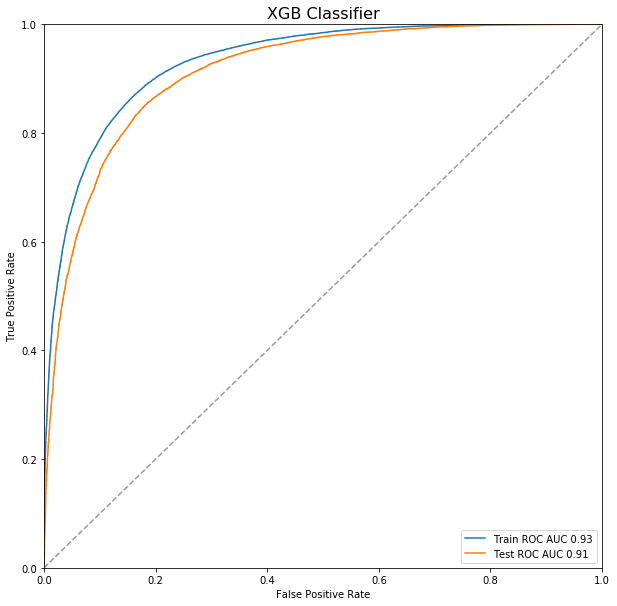

In [48]:
import matplotlib
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

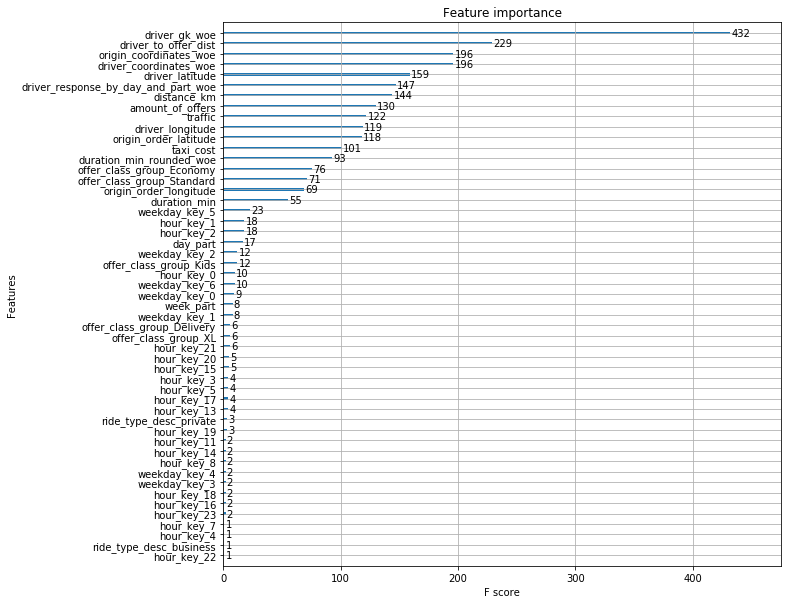

In [50]:
matplotlib.rcParams['figure.figsize'] = (10, 10)
xgboost.plot_importance(booster=xgb)
plt.savefig('../img/tree_importance_test1.png')